In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
from entropy_complexity import entropy_complexity, get_borders
from tqdm import tqdm
from math import factorial
from Lorentz_series import Lorentz

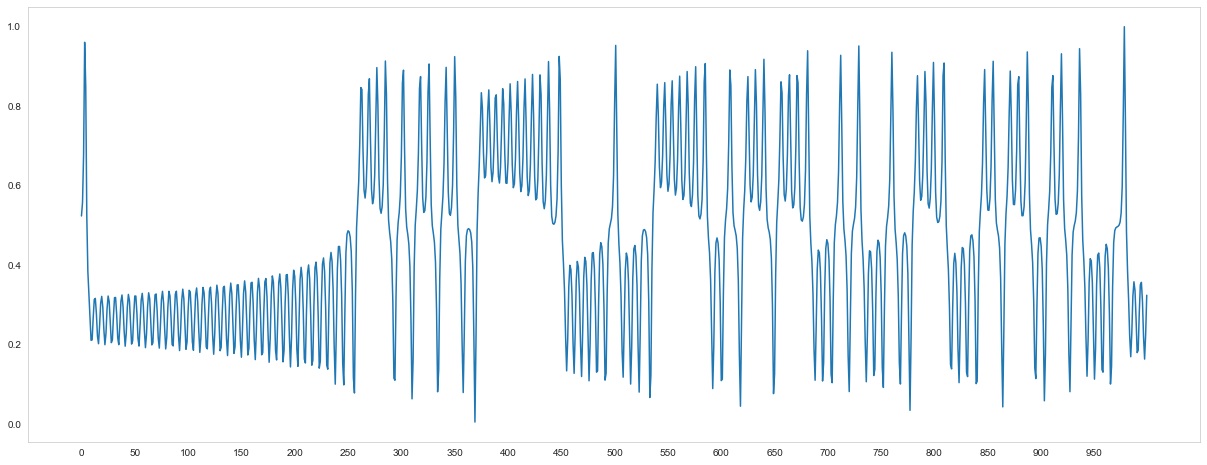

In [6]:
xs, _, _ = Lorentz().generate(0.1, 10300)
xs = (xs - xs.min()) / (xs.max() - xs.min())
plt.figure(figsize=(21, 8))
plt.plot(xs[0:1000])
plt.xticks([i for i in range(0, 1000, 50)])
plt.grid()
plt.show()

In [8]:
xs_trunc = xs[301:]

In [10]:
def logistic(r=4, n=100000, x0=.4):
    x = np.zeros(n)
    x[0] = x0
    for i in range(n-1):
        x[i+1] = r*x[i]*(1-x[i])
    return(x)

In [17]:
logistic_series = logistic(n=len(xs_trunc))
white_noise = np.random.normal(size=len(xs_trunc))

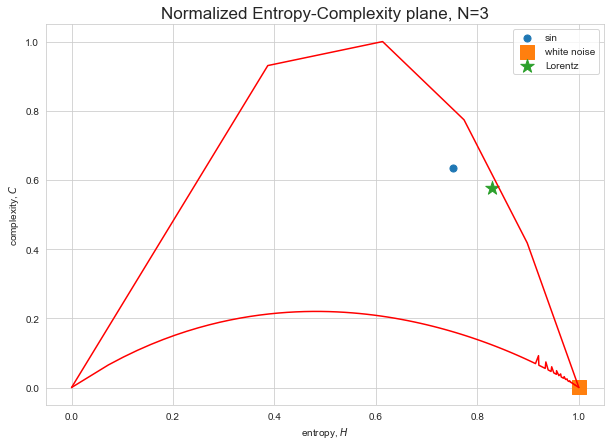

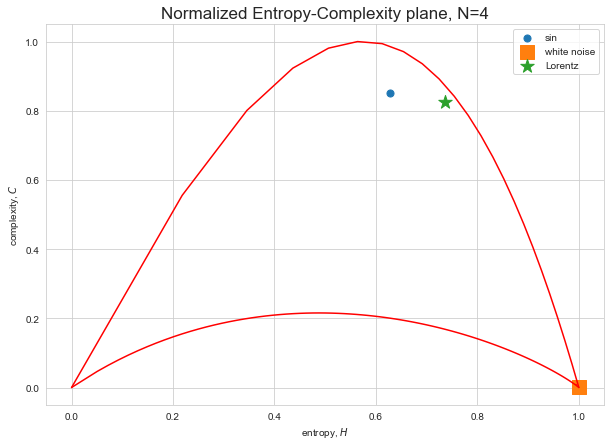

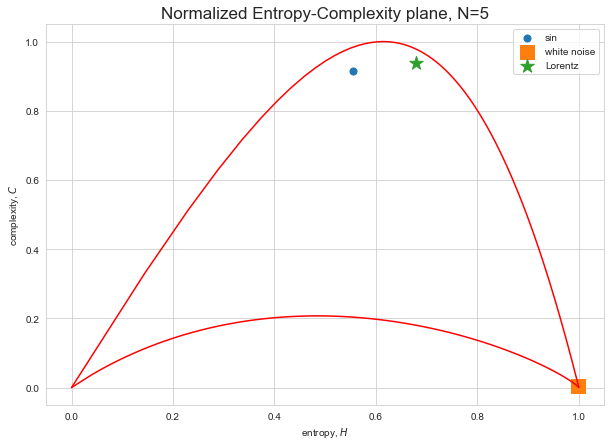

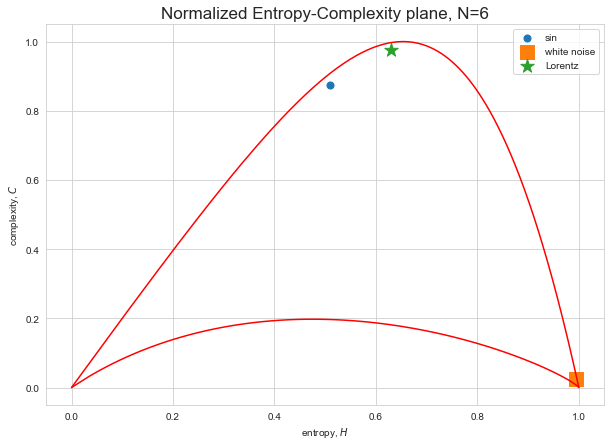

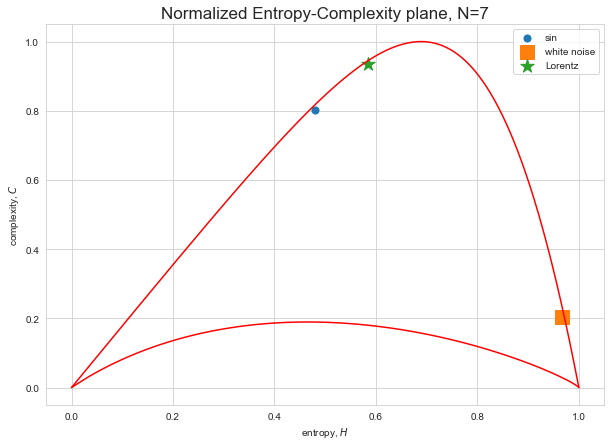

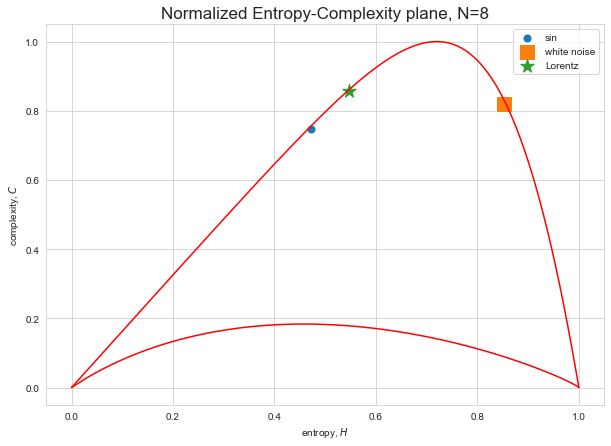

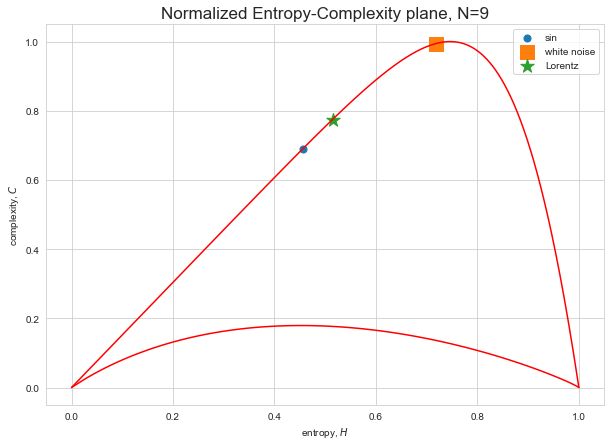

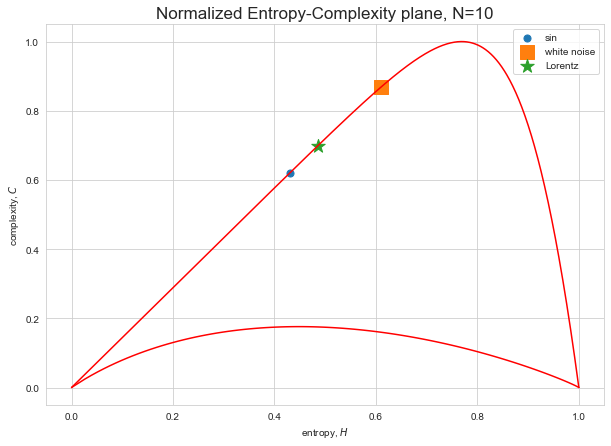

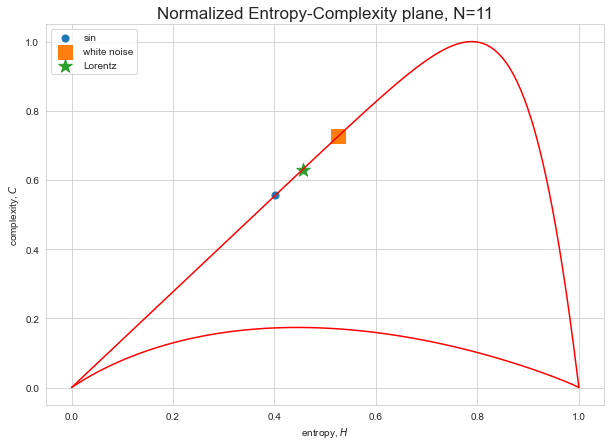

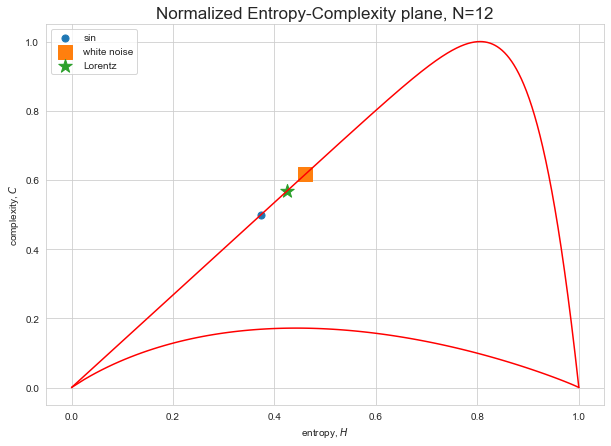

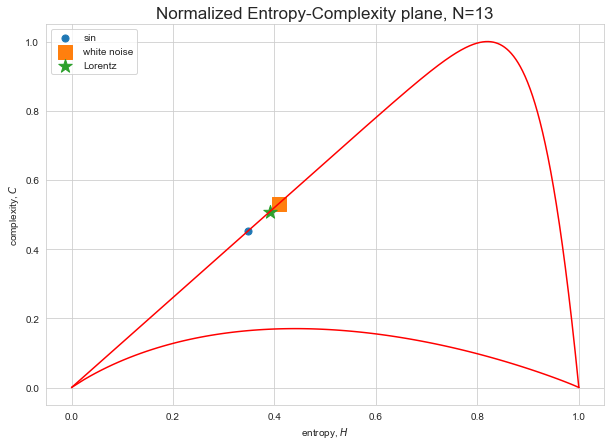

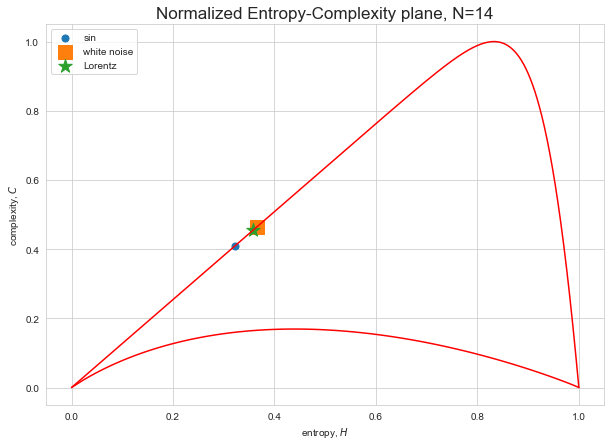

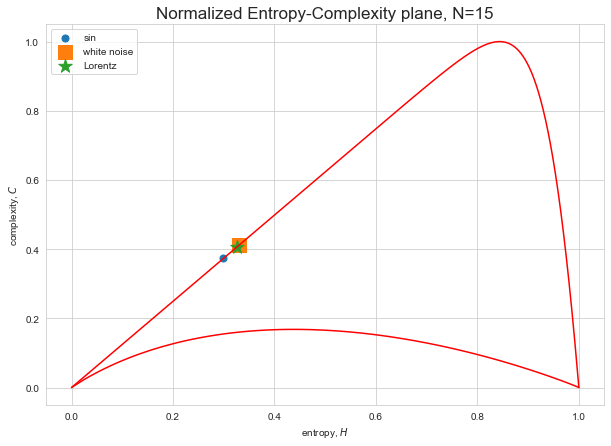

In [25]:
lorentz_trajectory = []
noise_trajectory = []
logistic_trajectory = []
for N in range(3, 16):
    M = 1
    min_ec, max_ec = get_borders(n=N, m=M)
    apex = max(max_ec.T[1])
    max_ec.T[1] /= apex #нормализуем верхнюю границу плоскости
    
    ec_lorentz = list(entropy_complexity(xs_trunc, n=N, m=M))
    ec_lorentz[1] /= apex
    lorentz_trajectory.append(ec_lorentz)
    
    ec_noise = list(entropy_complexity(white_noise, n=N, m=M))
    ec_noise[1] /= apex
    noise_trajectory.append(ec_noise)
    
    ec_logistic = list(entropy_complexity(logistic_series, n=N, m=M))
    ec_logistic[1] /= apex
    logistic_trajectory.append(ec_logistic)
    
    
    f, ax = plt.subplots(1,1,figsize=(10, 7))
    ax.plot(max_ec[:,0], max_ec[:,1],color='r')
    ax.plot(min_ec[:,0], min_ec[:,1],color='r')
    
    ax.scatter(*ec_lorentz, label="sin", s=200, marker='.')
    ax.scatter(*ec_noise, label="white noise", s=200, marker='s')
    ax.scatter(*ec_logistic, label="Lorentz", s=200, marker='*')
    
    ax.set_xlabel('entropy, $H$')
    ax.set_ylabel('complexity, $C$')
    plt.title("Normalized Entropy-Complexity plane, N=%s" % (N), fontsize = 17)
    ax.legend()
    plt.show()

<AxesSubplot:>

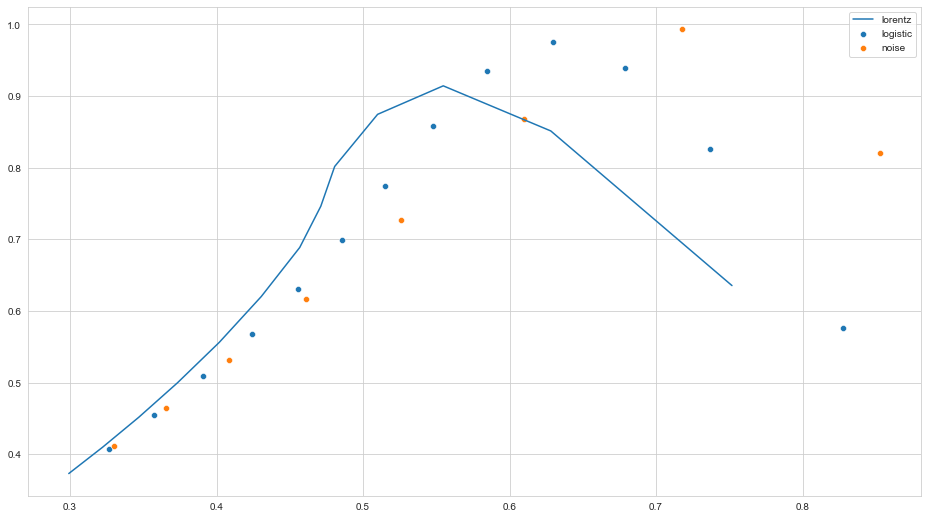

In [39]:
plt.figure(figsize=(16, 9))
sns.lineplot(x=np.array(lorentz_trajectory).T[0], y=np.array(lorentz_trajectory).T[1], label="lorentz")
sns.scatterplot(x=np.array(logistic_trajectory).T[0], y=np.array(logistic_trajectory).T[1], label="logistic")
sns.scatterplot(x=np.array(noise_trajectory).T[0][5:], y=np.array(noise_trajectory).T[1][5:], label="noise")

In [46]:
shifted_noise = noise_trajectory[5:]
trunc_lorentz = lorentz_trajectory[:len(shifted_noise)]

In [32]:
def normalizing_function(trajectory, trajectory_norm):
    return trajectory / np.sqrt(trajectory_norm)

In [48]:
normalized_lorentz = normalizing_function(trunc_lorentz, shifted_noise)

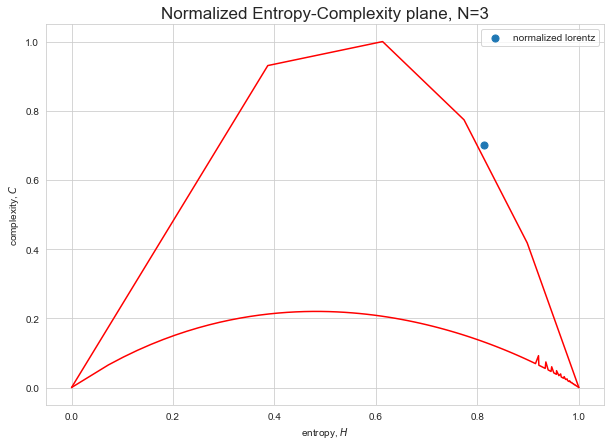

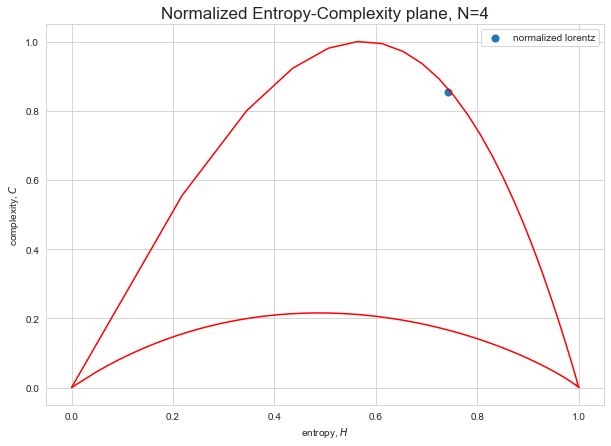

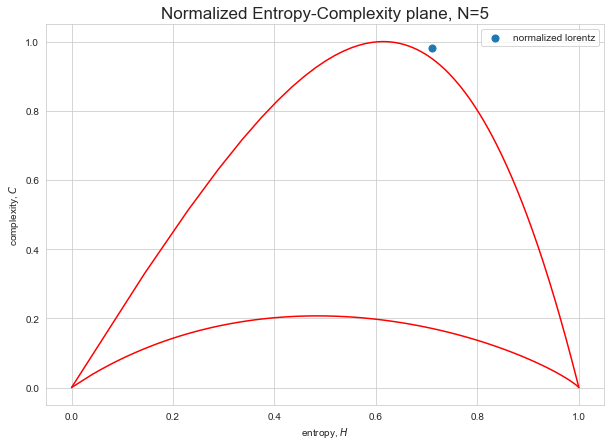

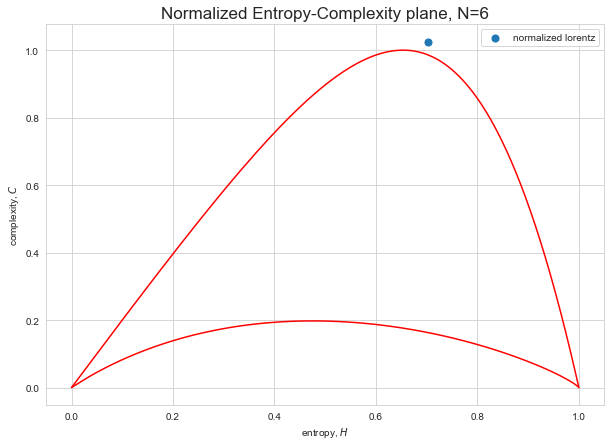

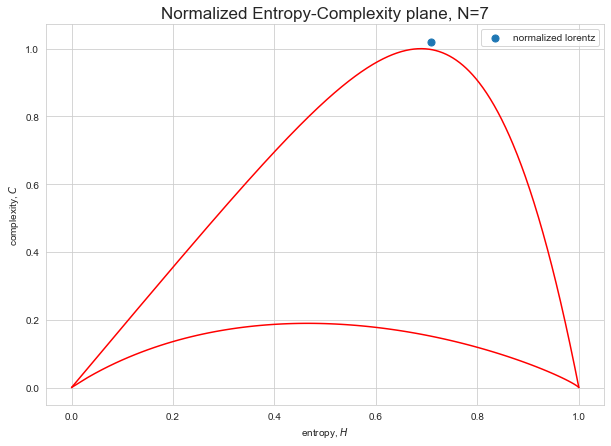

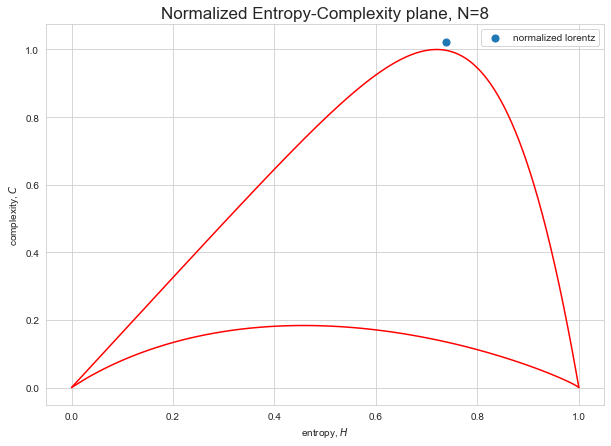

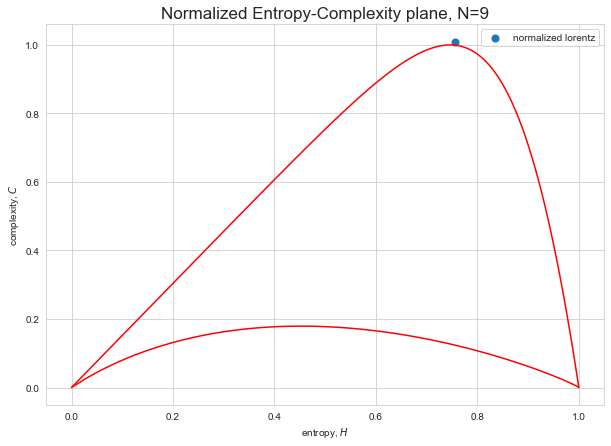

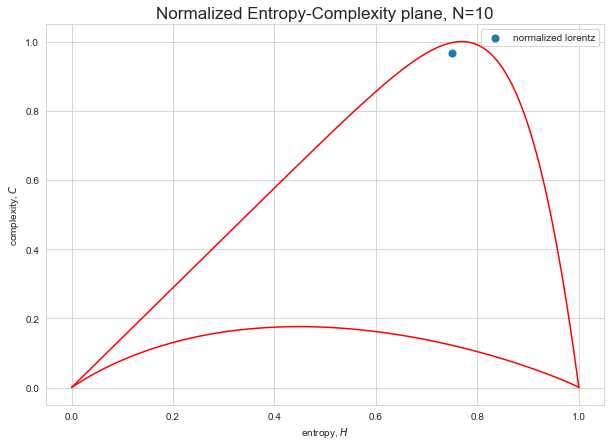

IndexError: index 8 is out of bounds for axis 0 with size 8

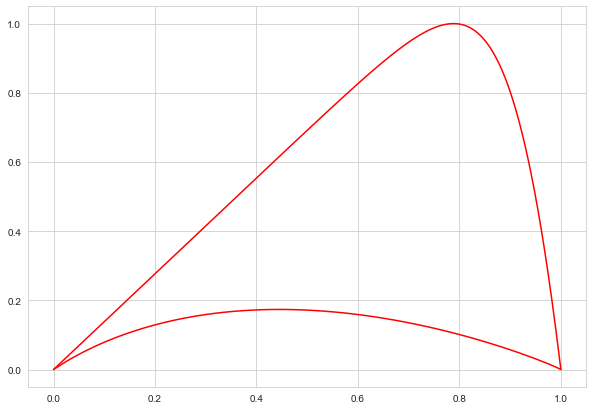

In [49]:
for N in range(3, 16):
    M = 1
    
    min_ec, max_ec = get_borders(n=N, m=M)
    apex = max(max_ec.T[1])
    max_ec.T[1] /= apex
    
    f, ax = plt.subplots(1,1,figsize=(10, 7))
    ax.plot(max_ec[:,0], max_ec[:,1],color='r')
    ax.plot(min_ec[:,0], min_ec[:,1],color='r')
    
    ax.scatter(*normalized_lorentz[N-3], label="normalized lorentz", s=200, marker='.')
    
    ax.set_xlabel('entropy, $H$')
    ax.set_ylabel('complexity, $C$')
    plt.title("Normalized Entropy-Complexity plane, N=%s" % (N), fontsize = 17)
    ax.legend()
    plt.show()